In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [1]:


train_data = pd.read_csv("""E:/AI engineer/Guvi/Capstone Projects/Project4/Customer_Conversion_Analysis/data/train.csv""")
test_data = pd.read_csv("""E:/AI engineer/Guvi/Capstone Projects/Project4/Customer_Conversion_Analysis/data/test.csv""")

NameError: name 'pd' is not defined

In [3]:
import sys
print(sys.executable)

e:\AI engineer\Guvi\Capstone Projects\Project4\Customer_Conversion_Analysis\venv\Scripts\python.exe


Description of Data

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [6]:
train_data.describe(include="all")

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
count,132379.0,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B4,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2824,NaN,NaN,NaN,NaN,NaN,NaN
mean,2008.0,5.582759,14.507671,9.811314,26.949629,12038.722063,2.400426,NaN,6.227393,3.261106,1.260026,43.788191,1.488484,1.712137
std,0.0,1.328064,8.829106,13.458937,7.153071,7012.460866,1.145004,NaN,4.238354,1.714058,0.438650,12.539390,0.499869,0.983699
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5905.000000,1.000000,NaN,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11931.000000,2.000000,NaN,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18212.000000,3.000000,NaN,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000


In [7]:
train_data.head(7)

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2
5,2008,8,8,1,29,23239,3,C38,13,1,1,38,2,3
6,2008,5,2,11,29,7109,3,C24,12,2,1,33,2,2


## Mapping

In [8]:
country_mapping = {
    1: "Australia",
    2: "Austria",
    3: "Belgium",
    4: "British Virgin Islands",
    5: "Cayman Islands",
    6: "Christmas Island",
    7: "Croatia",
    8: "Cyprus",
    9: "Czech Republic",
    10: "Denmark",
    11: "Estonia",
    12: "unidentified",
    13: "Faroe Islands",
    14: "Finland",
    15: "France",
    16: "Germany",
    17: "Greece",
    18: "Hungary",
    19: "Iceland",
    20: "India",
    21: "Ireland",
    22: "Italy",
    23: "Latvia",
    24: "Lithuania",
    25: "Luxembourg",
    26: "Mexico",
    27: "Netherlands",
    28: "Norway",
    29: "Poland",
    30: "Portugal",
    31: "Romania",
    32: "Russia",
    33: "San Marino",
    34: "Slovakia",
    35: "Slovenia",
    36: "Spain",
    37: "Sweden",
    38: "Switzerland",
    39: "Ukraine",
    40: "United Arab Emirates",
    41: "United Kingdom",
    42: "USA",
    43: "biz (.biz)",
    44: "com (.com)",
    45: "int (.int)",
    46: "net (.net)",
    47: "org (*.org)"
}

In [9]:
color_mapping = {
    1: "beige",
    2: "black",
    3: "blue",
    4: "brown",
    5: "burgundy",
    6: "gray",
    7: "green",
    8: "navy blue",
    9: "of many colors",
    10: "olive",
    11: "pink",
    12: "red",
    13: "violet",
    14: "white"
}

In [16]:
product_mapping={
    1:"trousers",
2:"skirts",
3:"blouses",
4:"sale"
}

# EDA

### 1. Unique Sessions

In [10]:
print(f"Total unique sessions: {train_data['session_id'].nunique()}")

Total unique sessions: 22910


### 2. Most Frequent Countries

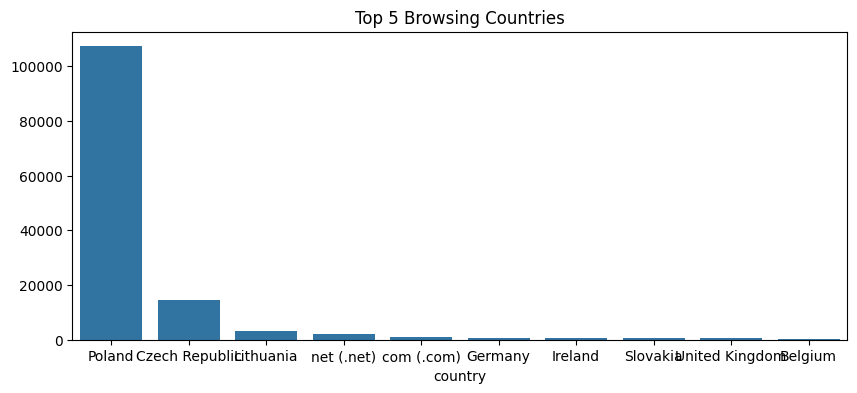

In [14]:
top_countries = train_data["country"].value_counts().head(10).rename(index=country_mapping)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 5 Browsing Countries")
plt.show()

### 3. Most Popular Product Categories

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x=train_data["page1_main_category"].map(product_mapping))
plt.title("Main Product Categories Viewed")
plt.show()


: 